In [1]:
#Importing data manupulation libraries
import numpy as np
import pandas as pd
# importing data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# importing warings
import warnings
warnings.filterwarnings('ignore')
#importimg log
import logging
logging.basicConfig(filename='model.log',force=True,
                   level=logging.INFO,
                   format='%(asctime)s %(levelname)s %(message)s',
                   filemode='w')
#importing scikit learn libraries
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score                 

In [2]:
url=('https://raw.githubusercontent.com/harshthorve284/Life_Expectancy_Model/refs/heads/main/Life%20Expectancy%20Data.csv')
df=pd.read_csv(url)
df.sample(frac=1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
210,Barbados,2013,Developing,75.2,11.0,0,8.74,263.037284,91.0,0,53.0,0,91.0,7.57,91.0,0.1,15472.781400,NaN,3.8,3.8,0.792,15.3
1183,Iceland,2002,Developed,84.0,7.0,0,6.61,5948.096777,NaN,0,55.4,0,95.0,9.86,95.0,0.1,31996.217200,287523.0,1.0,0.9,0.859,17.2
378,Brunei Darussalam,2005,Developing,76.2,92.0,0,0.16,179.714781,99.0,9,31.2,0,93.0,2.62,94.0,0.1,2612.133450,NaN,6.4,5.9,0.834,14.1
651,Croatia,2005,Developed,75.2,116.0,0,11.59,167.231990,NaN,2,57.5,0,96.0,6.89,96.0,0.1,1224.245900,4442.0,1.8,1.8,0.777,13.6
961,Gabon,2000,Developing,61.0,296.0,2,8.87,218.172747,NaN,15,28.1,3,44.0,2.89,45.0,9.5,4116.466930,1231122.0,8.0,7.8,0.637,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,16.4,1500,79.0,4.33,82.0,0.2,1461.671957,124723629.0,26.9,27.7,0.580,10.8
1105,Guinea-Bissau,2000,Developing,52.1,3.0,5,2.84,6.699419,NaN,0,17.4,9,52.0,4.94,49.0,3.1,297.751944,1243229.0,1.2,1.2,0.000,6.4
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,17.0,1400,79.0,4.39,82.0,0.2,1446.985410,126365852.0,26.9,27.6,0.590,11.3
2578,Thailand,2006,Developing,73.0,168.0,13,6.18,433.921092,96.0,3588,23.6,15,98.0,3.49,98.0,0.5,3368.952576,65824164.0,8.7,8.9,0.686,12.4


In [3]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

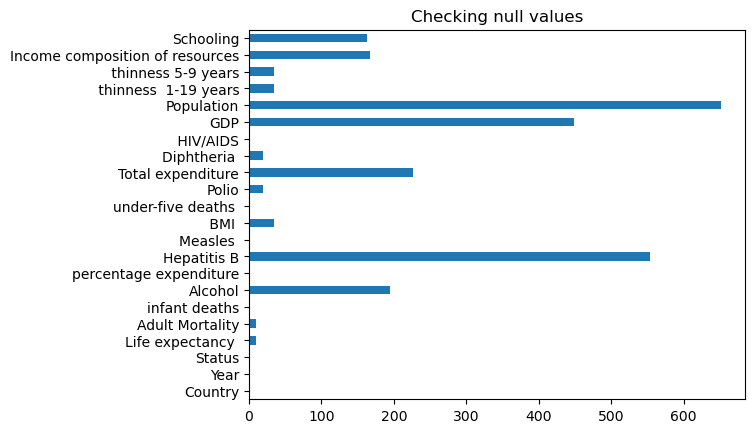

In [4]:
df.isnull().sum().plot(kind='barh')
plt.title('Checking null values')
plt.show()

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
(df['Schooling'].isnull().sum()/len(df['Schooling']))*100

5.547991831177672

In [10]:
(df['Income composition of resources'].isnull().sum()/len(df['Income composition of resources']))*100

5.684138869979578